In [4]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from numpy import *
import os
from random import shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
path1 = "C:/Data/CNN images/Input_data"
path2 = "C:/Data/CNN images/Input_data_resize"

listing = os.listdir(path1)
print (listing)
num_samples=size(listing)
print (num_samples)

img_rows, img_cols = 200, 200
img_channels = 1
for file in listing:
    im = Image.open(path1 + '\\' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'\\' +  file, "JPEG")
imlist = os.listdir(path2)
im1 = array(Image.open("C:/Data/CNN images/Input_data_resize" + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print (im1)
print (m,n)
print(imnbr)

['Gas1.png', 'Gas10.png', 'Gas11.png', 'Gas12.png', 'Gas13.png', 'Gas14.png', 'Gas15.png', 'Gas16.png', 'Gas17.png', 'Gas2.png', 'Gas3.png', 'Gas4.png', 'Gas5.png', 'Gas6.png', 'Gas7.png', 'Gas8.png', 'Gas9.png', 'Leak1.png', 'Leak10.png', 'Leak11.png', 'Leak12.png', 'Leak13.png', 'Leak14.png', 'Leak15.png', 'Leak16.png', 'Leak17.png', 'Leak18.png', 'Leak19.png', 'Leak2.png', 'Leak20.png', 'Leak21.png', 'Leak22.png', 'Leak23.png', 'Leak24.png', 'Leak25.png', 'Leak26.png', 'Leak27.png', 'Leak28.png', 'Leak29.png', 'Leak3.png', 'Leak30.png', 'Leak31.png', 'Leak32.png', 'Leak33.png', 'Leak34.png', 'Leak35.png', 'Leak36.png', 'Leak37.png', 'Leak38.png', 'Leak39.png', 'Leak4.png', 'Leak40.png', 'Leak41.png', 'Leak42.png', 'Leak43.png', 'Leak44.png', 'Leak45.png', 'Leak46.png', 'Leak47.png', 'Leak48.png', 'Leak49.png', 'Leak5.png', 'Leak50.png', 'Leak51.png', 'Leak52.png', 'Leak53.png', 'Leak54.png', 'Leak55.png', 'Leak56.png', 'Leak57.png', 'Leak58.png', 'Leak59.png', 'Leak6.png', 'Leak60.p

(149, 200, 200)
(149,)


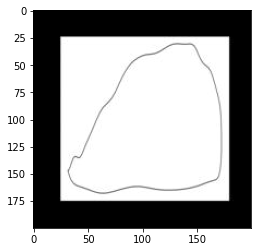

In [6]:
immatrix = array([array(Image.open("C:/Data/CNN images/Input_data_resize"+ '\\' + im2)).flatten()
              for im2 in imlist],'f')
label=np.ones((num_samples,),dtype = int)
label[0:17]=0
label[17:]=1
immatrix=immatrix.reshape(149,img_rows,img_cols)
data,Label = shuffle(immatrix,label)
train_data = [data,Label]

img=immatrix[20].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

import pandas as pd 
import numpy as np
DF = pd.DataFrame(img)
 
# save the dataframe as a csv file
DF.to_csv("C:/Data/CNN images/data2.csv")

In [9]:
(X, y) = (train_data[0],train_data[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (119, 1, 200, 200)
119 train samples
30 test samples


In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# convert to numpys to tensor

#tensor_x = tensor_x.type(torch.LongTensor)
#tensor_y = tensor_y.type(torch.LongTensor)
#tensor_xtest = tensor_xtest.type(torch.LongTensor)
#tensor_ytest = tensor_ytest.type(torch.LongTensor)
tensor_x = torch.Tensor(X_train) 
tensor_y = torch.Tensor(y_train)
tensor_xtest = torch.Tensor(X_test) 
tensor_ytest = torch.Tensor(y_test)
#tensor_x = tensor_x.type(torch.LongTensor)
tensor_y = tensor_y.type(torch.LongTensor)
#tensor_xtest = tensor_xtest.type(torch.LongTensor)
tensor_ytest = tensor_ytest.type(torch.LongTensor)

# create the dataset
custom_train = TensorDataset(tensor_x,tensor_y) 
custom_test = TensorDataset(tensor_xtest,tensor_ytest)


loaders = {
            'train' : torch.utils.data.DataLoader(custom_train, 
                                          batch_size=3, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(custom_test, 
                                          batch_size=3, 
                                          shuffle=False, 
                                          num_workers=1),
}
print (loaders)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x00000267FF874730>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x00000267DD4E1460>}


In [7]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(32, 64, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 50 classes
        self.out1 = nn.Linear(64 * 25 * 25, 2500)
        self.out2 = nn.Linear(2500, 50)
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # flatten the output of conv2 to (batch_size, 32 * 50 * 50)
        x = x.view(-1, 40000)
        x = F.relu(self.out1(x))
        x = F.dropout(x, training=self.training)
        #x = self.out2(x)
        #x = x.view(x.size(0), -1)       
        output = self.out2(x)
      
        
        return output, x    
cnn = CNN()
print(cnn)


loss_func = nn.CrossEntropyLoss()   
loss_func


from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer


from torch.autograd import Variable
num_epochs = 50
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
    print(total_step)
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            b_x = b_x.float()
            b_y = b_y.long()
            
          
            
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 10 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
               

train(num_epochs, cnn, loaders)

def test():
    import torch.nn as nn
    #class CNN(nn.Module):
        #cnn = CNN()
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            testoutp, lstlayr = cnn(images)
            predicy = torch.max(testoutp, 1)[1].data.squeeze()
            accu = (predicy == labels).sum().item() / float(labels.size(0))
            pass
            print(' Accuracy of the model  %.2f' % accu)
test()


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out1): Linear(in_features=40000, out_features=2500, bias=True)
  (out2): Linear(in_features=2500, out_features=50, bias=True)
)
40
Epoch [1/50], Step [10/40], Loss: 0.0000
Epoch [1/50], Step [20/40], Loss: 0.0000
Epoch [1/50], Step [30/40], Loss: 6.1849
Epoch [1/50], Step [40/40], Loss: 0.0118
Epoch [2/50], Step [10/40], Loss: 0.4327
Epoch [2/50], Step [20/40], Loss: 0.1600
Epoch [2/5

Epoch [45/50], Step [40/40], Loss: 0.1492
Epoch [46/50], Step [10/40], Loss: 0.1489
Epoch [46/50], Step [20/40], Loss: 0.1622
Epoch [46/50], Step [30/40], Loss: 0.1524
Epoch [46/50], Step [40/40], Loss: 0.1197
Epoch [47/50], Step [10/40], Loss: 0.1373
Epoch [47/50], Step [20/40], Loss: 0.2128
Epoch [47/50], Step [30/40], Loss: 0.0892
Epoch [47/50], Step [40/40], Loss: 1.5018
Epoch [48/50], Step [10/40], Loss: 0.7882
Epoch [48/50], Step [20/40], Loss: 1.8439
Epoch [48/50], Step [30/40], Loss: 0.8153
Epoch [48/50], Step [40/40], Loss: 0.1754
Epoch [49/50], Step [10/40], Loss: 0.1250
Epoch [49/50], Step [20/40], Loss: 0.7918
Epoch [49/50], Step [30/40], Loss: 0.1903
Epoch [49/50], Step [40/40], Loss: 2.3689
Epoch [50/50], Step [10/40], Loss: 0.7509
Epoch [50/50], Step [20/40], Loss: 0.1454
Epoch [50/50], Step [30/40], Loss: 0.1807
Epoch [50/50], Step [40/40], Loss: 0.1641
 Accuracy of the model  1.00
 Accuracy of the model  1.00
 Accuracy of the model  1.00
 Accuracy of the model  1.00
 A

In [8]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in loaders['test']:
        b_x = Variable(images)   # batch x
        b_y = Variable(labels)   # batch y
        output = cnn(b_x)[0]               
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

Accuracy: 93.33333333333333 %


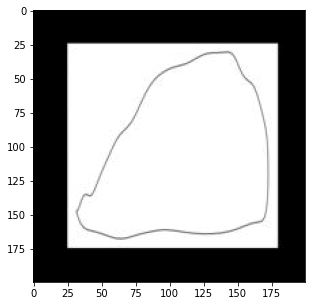

In [9]:
dataiter = iter(loaders['test'])
images, labels = dataiter.next()
output = cnn(images)                     # get sample outputs
images = images.numpy()                    # prep images for display
# get one image from the batch
img = np.squeeze(images[1])

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
plt.show()

In [10]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:15].numpy()
actual_number

array([1, 1, 1], dtype=int64)

In [11]:
test_output, last_layer = cnn(imgs[:15])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [1 1 1]
Actual number: [1 1 1]
